In [1]:
import requests
import os
import pandas as pd
import json
import csv

In [2]:
# Open the data from CSV files into DataFrames
df_city_bike = pd.read_csv('city_bikes.csv')
df_foursquare = pd.read_csv('foursquare.csv')
df_yelp_businesses = pd.read_csv('yelp_businesses.csv')

## Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [3]:
# Merge the CityBikes and Foursquare DFs
# Using outer join to include all data, filter out later
CB_FS = df_city_bike.merge(df_foursquare, on=['Station Name'], how='outer')

# Print newly merged DF
CB_FS

,Station Name,Latitude_x,Longitude_x,Available Bikes,Empty Slots,Bubble Tea Shop Name,Rating,Latitude_y,Longitude_y
0,10th & Cambie,49.262487,-123.114397,5,30,OneZo Tapioca,NaN,NaN,NaN
1,Yaletown-Roundhouse Station,49.274566,-123.121817,15,1,ShareTea Yaletown,NaN,NaN,NaN
2,Yaletown-Roundhouse Station,49.274566,-123.121817,15,1,Chabann Kurotaki,NaN,NaN,NaN
3,Yaletown-Roundhouse Station,49.274566,-123.121817,15,1,Cha Yuan,NaN,NaN,NaN
4,Dunsmuir & Beatty,49.279764,-123.110154,4,22,Gong Cha,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
469,Cordova & Granville,49.285670,-123.112543,9,8,Chatime,NaN,NaN,NaN
470,22nd & Main,49.250940,-123.101306,3,11,NaN,NaN,NaN,NaN
471,PNE - Hastings & Windermere,49.280977,-123.035969,2,38,NaN,NaN,NaN,NaN
472,1st & Fir,49.270783,-123.141564,9,11,NaN,NaN,NaN,NaN


In [4]:
# Merge Yelp businesses into the CB_FS DF
all_data = CB_FS.merge(df_yelp_businesses, on=['Station Name'], how='outer')

# Print DF
all_data

,Station Name,Latitude_x,Longitude_x,Available Bikes,Empty Slots,Bubble Tea Shop Name_x,Rating_x,Latitude_y,Longitude_y,Station Latitude,Station Longitude,Bubble Tea Shop Name_y,Rating_y,Business Latitude,Business Longitude
0,10th & Cambie,49.262487,-123.114397,5,30,OneZo Tapioca,NaN,NaN,NaN,49.259935,-123.114855,Sharetea,4.0,49.259935,-123.114855
1,10th & Cambie,49.262487,-123.114397,5,30,OneZo Tapioca,NaN,NaN,NaN,49.259935,-123.114855,Bubble Waffle Cafe,4.0,49.260860,-123.116290
2,10th & Cambie,49.262487,-123.114397,5,30,OneZo Tapioca,NaN,NaN,NaN,49.259935,-123.114855,Hot Cha Cafe,4.5,49.255697,-123.114906
3,10th & Cambie,49.262487,-123.114397,5,30,OneZo Tapioca,NaN,NaN,NaN,49.259935,-123.114855,OneZo Tapioca,4.5,49.263037,-123.118080
4,10th & Cambie,49.262487,-123.114397,5,30,OneZo Tapioca,NaN,NaN,NaN,49.259935,-123.114855,Ben Gong’s Tea,3.5,49.255610,-123.114909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4908,Cordova & Granville,49.285670,-123.112543,9,8,Chatime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4909,22nd & Main,49.250940,-123.101306,3,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4910,PNE - Hastings & Windermere,49.280977,-123.035969,2,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4911,1st & Fir,49.270783,-123.141564,9,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Cleaning/Audit

In [5]:
# Check 3 columns to see if all values are NaN. If they are, we will drop the columns.
columns_to_check = ['Rating_x','Latitude_y','Longitude_y'] 

for column_name in columns_to_check:
    if all_data[column_name].isna().all():
        print(f"All values in '{column_name}' are NaN.")
    else:
        print(f"Not all values in '{column_name}' are NaN.")

All values in 'Rating_x' are NaN.
All values in 'Latitude_y' are NaN.
All values in 'Longitude_y' are NaN.


In [6]:
# Drop the 3 columns above.
columns_to_drop = ['Rating_x','Latitude_y','Longitude_y'] 
all_data.drop(columns=columns_to_drop, inplace=True)

#Print DF after dropping columns
all_data

,Station Name,Latitude_x,Longitude_x,Available Bikes,Empty Slots,Bubble Tea Shop Name_x,Station Latitude,Station Longitude,Bubble Tea Shop Name_y,Rating_y,Business Latitude,Business Longitude
0,10th & Cambie,49.262487,-123.114397,5,30,OneZo Tapioca,49.259935,-123.114855,Sharetea,4.0,49.259935,-123.114855
1,10th & Cambie,49.262487,-123.114397,5,30,OneZo Tapioca,49.259935,-123.114855,Bubble Waffle Cafe,4.0,49.260860,-123.116290
2,10th & Cambie,49.262487,-123.114397,5,30,OneZo Tapioca,49.259935,-123.114855,Hot Cha Cafe,4.5,49.255697,-123.114906
3,10th & Cambie,49.262487,-123.114397,5,30,OneZo Tapioca,49.259935,-123.114855,OneZo Tapioca,4.5,49.263037,-123.118080
4,10th & Cambie,49.262487,-123.114397,5,30,OneZo Tapioca,49.259935,-123.114855,Ben Gong’s Tea,3.5,49.255610,-123.114909
...,...,...,...,...,...,...,...,...,...,...,...,...
4908,Cordova & Granville,49.285670,-123.112543,9,8,Chatime,NaN,NaN,NaN,NaN,NaN,NaN
4909,22nd & Main,49.250940,-123.101306,3,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4910,PNE - Hastings & Windermere,49.280977,-123.035969,2,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4911,1st & Fir,49.270783,-123.141564,9,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
columns_to_check = ['Bubble Tea Shop Name_x', 'Bubble Tea Shop Name_y']

for column_name in columns_to_check:
    non_nan_count = all_data[column_name].count()
    print(f"The number of non-NaN values in '{column_name}' is: {non_nan_count}")

The number of non-NaN values in 'Bubble Tea Shop Name_x' is: 4724
The number of non-NaN values in 'Bubble Tea Shop Name_y' is: 4706


In [8]:
columns_to_check = ['Bubble Tea Shop Name_x', 'Bubble Tea Shop Name_y']

for column_name in columns_to_check:
    unique_values = all_data[column_name].nunique()
    print(f"Unique values in '{column_name}': {unique_values}")

Unique values in 'Bubble Tea Shop Name_x': 53
Unique values in 'Bubble Tea Shop Name_y': 54


While Bubble Tea Shop Name_x has more non-NaN values, I'm opting to clear all NaN rows based off of the Bubble Tea Shop Name_y.

In [9]:
# Drop rows with NaN in Bubble Tea Shop Name_y
all_data.dropna(subset=['Bubble Tea Shop Name_y'], inplace=True)

In [10]:
# check new DF
all_data

,Station Name,Latitude_x,Longitude_x,Available Bikes,Empty Slots,Bubble Tea Shop Name_x,Station Latitude,Station Longitude,Bubble Tea Shop Name_y,Rating_y,Business Latitude,Business Longitude
0,10th & Cambie,49.262487,-123.114397,5,30,OneZo Tapioca,49.259935,-123.114855,Sharetea,4.0,49.259935,-123.114855
1,10th & Cambie,49.262487,-123.114397,5,30,OneZo Tapioca,49.259935,-123.114855,Bubble Waffle Cafe,4.0,49.260860,-123.116290
2,10th & Cambie,49.262487,-123.114397,5,30,OneZo Tapioca,49.259935,-123.114855,Hot Cha Cafe,4.5,49.255697,-123.114906
3,10th & Cambie,49.262487,-123.114397,5,30,OneZo Tapioca,49.259935,-123.114855,OneZo Tapioca,4.5,49.263037,-123.118080
4,10th & Cambie,49.262487,-123.114397,5,30,OneZo Tapioca,49.259935,-123.114855,Ben Gong’s Tea,3.5,49.255610,-123.114909
...,...,...,...,...,...,...,...,...,...,...,...,...
4768,Richards & Davie,49.275683,-123.124388,12,1,Cha Yuan,49.276097,-123.119294,Teaspoons & Company,4.5,49.279506,-123.124349
4769,Richards & Davie,49.275683,-123.124388,12,1,Cha Yuan,49.276097,-123.119294,Cha Yuan,4.5,49.274020,-123.122430
4770,Richards & Davie,49.275683,-123.124388,12,1,Cha Yuan,49.276097,-123.119294,Jenjudan Yaletown,4.0,49.278330,-123.116210
4771,Richards & Davie,49.275683,-123.124388,12,1,Cha Yuan,49.276097,-123.119294,Gong Cha,3.0,49.279203,-123.116752


In [11]:
# Visualize first 25 results to see if there are duplicates, using Bubble Tea Shop Name_x as reference
all_data.head(25)

,Station Name,Latitude_x,Longitude_x,Available Bikes,Empty Slots,Bubble Tea Shop Name_x,Station Latitude,Station Longitude,Bubble Tea Shop Name_y,Rating_y,Business Latitude,Business Longitude
0,10th & Cambie,49.262487,-123.114397,5,30,OneZo Tapioca,49.259935,-123.114855,Sharetea,4.0,49.259935,-123.114855
1,10th & Cambie,49.262487,-123.114397,5,30,OneZo Tapioca,49.259935,-123.114855,Bubble Waffle Cafe,4.0,49.260860,-123.116290
2,10th & Cambie,49.262487,-123.114397,5,30,OneZo Tapioca,49.259935,-123.114855,Hot Cha Cafe,4.5,49.255697,-123.114906
3,10th & Cambie,49.262487,-123.114397,5,30,OneZo Tapioca,49.259935,-123.114855,OneZo Tapioca,4.5,49.263037,-123.118080
4,10th & Cambie,49.262487,-123.114397,5,30,OneZo Tapioca,49.259935,-123.114855,Ben Gong’s Tea,3.5,49.255610,-123.114909
5,10th & Cambie,49.262487,-123.114397,5,30,OneZo Tapioca,49.260860,-123.116290,Bubble Waffle Cafe,4.0,49.260860,-123.116290
6,10th & Cambie,49.262487,-123.114397,5,30,OneZo Tapioca,49.260860,-123.116290,Sharetea,4.0,49.259935,-123.114855
7,10th & Cambie,49.262487,-123.114397,5,30,OneZo Tapioca,49.260860,-123.116290,OneZo Tapioca,4.5,49.263037,-123.118080
8,10th & Cambie,49.262487,-123.114397,5,30,OneZo Tapioca,49.263037,-123.118080,OneZo Tapioca,4.5,49.263037,-123.118080
9,10th & Cambie,49.262487,-123.114397,5,30,OneZo Tapioca,49.263037,-123.118080,Bubble Waffle Cafe,4.0,49.260860,-123.116290


In [12]:
# Bubble Tea Shop Name_x and coordinates don't make sense (could have two different coordinates?), meaning data is likely incorrect. 
# Test plotting into Google Maps has the Yelp data correct.

# Drop the columns Bubble Tea Shop Name_x, Station Latitude, Station Longitude
columns_to_drop = ['Bubble Tea Shop Name_x','Station Latitude','Station Longitude'] 
all_data.drop(columns=columns_to_drop, inplace=True)

In [13]:
# Print DF
all_data

,Station Name,Latitude_x,Longitude_x,Available Bikes,Empty Slots,Bubble Tea Shop Name_y,Rating_y,Business Latitude,Business Longitude
0,10th & Cambie,49.262487,-123.114397,5,30,Sharetea,4.0,49.259935,-123.114855
1,10th & Cambie,49.262487,-123.114397,5,30,Bubble Waffle Cafe,4.0,49.260860,-123.116290
2,10th & Cambie,49.262487,-123.114397,5,30,Hot Cha Cafe,4.5,49.255697,-123.114906
3,10th & Cambie,49.262487,-123.114397,5,30,OneZo Tapioca,4.5,49.263037,-123.118080
4,10th & Cambie,49.262487,-123.114397,5,30,Ben Gong’s Tea,3.5,49.255610,-123.114909
...,...,...,...,...,...,...,...,...,...
4768,Richards & Davie,49.275683,-123.124388,12,1,Teaspoons & Company,4.5,49.279506,-123.124349
4769,Richards & Davie,49.275683,-123.124388,12,1,Cha Yuan,4.5,49.274020,-123.122430
4770,Richards & Davie,49.275683,-123.124388,12,1,Jenjudan Yaletown,4.0,49.278330,-123.116210
4771,Richards & Davie,49.275683,-123.124388,12,1,Gong Cha,3.0,49.279203,-123.116752


In [14]:
# Check duplicate data/results for each station, remove duplicates based off station.
# NOTE: I don't want to result in only unique bubble tea shop names at this time. I want to see how many unique Bubble Tea Shops there are per bike station, not overall.

# Cast Business lat/lng to string and concat station name, shop name, lat, long to produce unique ID.
all_data['Business Latitude'] = all_data['Business Latitude'].astype(str)
all_data['Business Longitude'] = all_data['Business Longitude'].astype(str)

all_data['Concat_Column'] = all_data['Station Name'] + all_data['Bubble Tea Shop Name_y'] + all_data['Business Latitude'] + all_data['Business Longitude']

In [15]:
all_data

,Station Name,Latitude_x,Longitude_x,Available Bikes,Empty Slots,Bubble Tea Shop Name_y,Rating_y,Business Latitude,Business Longitude,Concat_Column
0,10th & Cambie,49.262487,-123.114397,5,30,Sharetea,4.0,49.2599346,-123.1148551,10th & CambieSharetea49.2599346-123.1148551
1,10th & Cambie,49.262487,-123.114397,5,30,Bubble Waffle Cafe,4.0,49.26086,-123.11629,10th & CambieBubble Waffle Cafe49.26086-123.11629
2,10th & Cambie,49.262487,-123.114397,5,30,Hot Cha Cafe,4.5,49.2556974,-123.1149056,10th & CambieHot Cha Cafe49.2556974-123.1149056
3,10th & Cambie,49.262487,-123.114397,5,30,OneZo Tapioca,4.5,49.2630371,-123.1180803,10th & CambieOneZo Tapioca49.2630371-123.1180803
4,10th & Cambie,49.262487,-123.114397,5,30,Ben Gong’s Tea,3.5,49.25561,-123.1149094,10th & CambieBen Gong’s Tea49.25561-123.1149094
...,...,...,...,...,...,...,...,...,...,...
4768,Richards & Davie,49.275683,-123.124388,12,1,Teaspoons & Company,4.5,49.279506,-123.1243488,Richards & DavieTeaspoons & Company49.279506-1...
4769,Richards & Davie,49.275683,-123.124388,12,1,Cha Yuan,4.5,49.27402,-123.12243,Richards & DavieCha Yuan49.27402-123.12243
4770,Richards & Davie,49.275683,-123.124388,12,1,Jenjudan Yaletown,4.0,49.27833,-123.11621,Richards & DavieJenjudan Yaletown49.27833-123....
4771,Richards & Davie,49.275683,-123.124388,12,1,Gong Cha,3.0,49.2792027,-123.1167521,Richards & DavieGong Cha49.2792027-123.1167521


In [16]:
# Check for duplicate values from the unique ID in Concat_column
duplicate_rows = all_data.duplicated(subset=['Concat_Column'])

# remove duplicates
all_data_no_duplicates = all_data[~duplicate_rows]

In [17]:
all_data_no_duplicates

,Station Name,Latitude_x,Longitude_x,Available Bikes,Empty Slots,Bubble Tea Shop Name_y,Rating_y,Business Latitude,Business Longitude,Concat_Column
0,10th & Cambie,49.262487,-123.114397,5,30,Sharetea,4.0,49.2599346,-123.1148551,10th & CambieSharetea49.2599346-123.1148551
1,10th & Cambie,49.262487,-123.114397,5,30,Bubble Waffle Cafe,4.0,49.26086,-123.11629,10th & CambieBubble Waffle Cafe49.26086-123.11629
2,10th & Cambie,49.262487,-123.114397,5,30,Hot Cha Cafe,4.5,49.2556974,-123.1149056,10th & CambieHot Cha Cafe49.2556974-123.1149056
3,10th & Cambie,49.262487,-123.114397,5,30,OneZo Tapioca,4.5,49.2630371,-123.1180803,10th & CambieOneZo Tapioca49.2630371-123.1180803
4,10th & Cambie,49.262487,-123.114397,5,30,Ben Gong’s Tea,3.5,49.25561,-123.1149094,10th & CambieBen Gong’s Tea49.25561-123.1149094
...,...,...,...,...,...,...,...,...,...,...
4698,Richards & Davie,49.275683,-123.124388,12,1,Sharetea Yaletown,5.0,49.27609727880593,-123.11929431348956,Richards & DavieSharetea Yaletown49.2760972788...
4699,Richards & Davie,49.275683,-123.124388,12,1,Kurotaki Bubble Tea House,3.0,49.27464608371603,-123.12584949328874,Richards & DavieKurotaki Bubble Tea House49.27...
4710,Richards & Davie,49.275683,-123.124388,12,1,Jenjudan Yaletown,4.0,49.27833,-123.11621,Richards & DavieJenjudan Yaletown49.27833-123....
4711,Richards & Davie,49.275683,-123.124388,12,1,Gong Cha,3.0,49.2792027,-123.1167521,Richards & DavieGong Cha49.2792027-123.1167521


In [18]:
# Recast the business lat/lng into float
all_data_no_duplicates['Business Latitude'] = all_data_no_duplicates['Business Latitude'].astype(float)
all_data_no_duplicates['Business Longitude'] = all_data_no_duplicates['Business Longitude'].astype(float)

# Drop unique ID concat_column
all_data_no_duplicates.drop(columns=['Concat_Column'], inplace=True)

C:\Users\Curtis\AppData\Local\Temp\ipykernel_19288\231754191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_no_duplicates['Business Latitude'] = all_data_no_duplicates['Business Latitude'].astype(float)
C:\Users\Curtis\AppData\Local\Temp\ipykernel_19288\231754191.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_no_duplicates['Business Longitude'] = all_data_no_duplicates['Business Longitude'].astype(float)
C:\Users\Curtis\AppData\Local\Temp\ipykernel_19288\231754191.py:6: SettingWi

In [19]:
all_data_no_duplicates

,Station Name,Latitude_x,Longitude_x,Available Bikes,Empty Slots,Bubble Tea Shop Name_y,Rating_y,Business Latitude,Business Longitude
0,10th & Cambie,49.262487,-123.114397,5,30,Sharetea,4.0,49.259935,-123.114855
1,10th & Cambie,49.262487,-123.114397,5,30,Bubble Waffle Cafe,4.0,49.260860,-123.116290
2,10th & Cambie,49.262487,-123.114397,5,30,Hot Cha Cafe,4.5,49.255697,-123.114906
3,10th & Cambie,49.262487,-123.114397,5,30,OneZo Tapioca,4.5,49.263037,-123.118080
4,10th & Cambie,49.262487,-123.114397,5,30,Ben Gong’s Tea,3.5,49.255610,-123.114909
...,...,...,...,...,...,...,...,...,...
4698,Richards & Davie,49.275683,-123.124388,12,1,Sharetea Yaletown,5.0,49.276097,-123.119294
4699,Richards & Davie,49.275683,-123.124388,12,1,Kurotaki Bubble Tea House,3.0,49.274646,-123.125849
4710,Richards & Davie,49.275683,-123.124388,12,1,Jenjudan Yaletown,4.0,49.278330,-123.116210
4711,Richards & Davie,49.275683,-123.124388,12,1,Gong Cha,3.0,49.279203,-123.116752


In [20]:
# Rename columns to clean up names
all_data_no_duplicates.rename(columns={
    'Latitude_x': 'Station Latitude',
    'Longitude_x': 'Station Longitude',
    'Bubble Tea Shop Name_y': 'Bubble Tea Shop Name',
    'Rating_y': 'Rating',
}, inplace=True)

C:\Users\Curtis\AppData\Local\Temp\ipykernel_19288\2877786130.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_no_duplicates.rename(columns={


In [21]:
all_data_no_duplicates

,Station Name,Station Latitude,Station Longitude,Available Bikes,Empty Slots,Bubble Tea Shop Name,Rating,Business Latitude,Business Longitude
0,10th & Cambie,49.262487,-123.114397,5,30,Sharetea,4.0,49.259935,-123.114855
1,10th & Cambie,49.262487,-123.114397,5,30,Bubble Waffle Cafe,4.0,49.260860,-123.116290
2,10th & Cambie,49.262487,-123.114397,5,30,Hot Cha Cafe,4.5,49.255697,-123.114906
3,10th & Cambie,49.262487,-123.114397,5,30,OneZo Tapioca,4.5,49.263037,-123.118080
4,10th & Cambie,49.262487,-123.114397,5,30,Ben Gong’s Tea,3.5,49.255610,-123.114909
...,...,...,...,...,...,...,...,...,...
4698,Richards & Davie,49.275683,-123.124388,12,1,Sharetea Yaletown,5.0,49.276097,-123.119294
4699,Richards & Davie,49.275683,-123.124388,12,1,Kurotaki Bubble Tea House,3.0,49.274646,-123.125849
4710,Richards & Davie,49.275683,-123.124388,12,1,Jenjudan Yaletown,4.0,49.278330,-123.116210
4711,Richards & Davie,49.275683,-123.124388,12,1,Gong Cha,3.0,49.279203,-123.116752


In [22]:
# Export cleaned DF
cleaned_data = 'cleaned_data.csv'
all_data_no_duplicates.to_csv(cleaned_data, index=False)

## Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discovered through this visualization. 

In [23]:
import matplotlib.pyplot as plt

In [24]:
# use a shortened name version of our newly cleaned DF
df_cleaned = pd.read_csv('cleaned_data.csv')

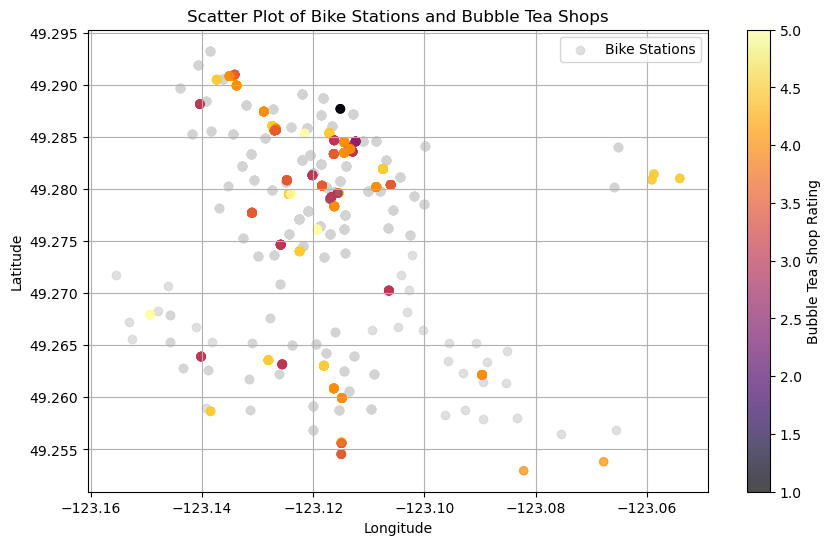

In [37]:
# Use scatterplot to plot geographic location - test to see if there is clustering (commercial vs residential districts)

plt.figure(figsize=(10, 6))

# Plot bike stations in black
plt.scatter(df_cleaned['Station Longitude'], df_cleaned['Station Latitude'], c='lightgrey', label='Bike Stations', alpha=0.7)

# Plot bubble tea shops with color-coded by Rating_y
sc = plt.scatter(df_cleaned['Business Longitude'], df_cleaned['Business Latitude'], c=df_cleaned['Rating'], cmap='inferno', alpha=0.7)
plt.colorbar(sc, label='Bubble Tea Shop Rating')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Bike Stations and Bubble Tea Shops')
plt.grid(True)
plt.legend()
plt.savefig('scatterplot.png', dpi=300, bbox_inches='tight')
plt.show()

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [ ]:
import pandas as pd
import sqlite3
import csv

# Define the paths for the SQLite database file using the created .csv files
yelp_db_path = pd.read_csv('yelp_businesses.csv')
foursquare_db_path = pd.read_csv('foursquare.csv')

# Function - create a table and insert data into the SQLite database
def create_and_insert_table(df, db_path, table_name):
    # Connect to the SQLite database
    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()

    create_table_query = f"""
    CREATE TABLE IF NOT EXISTS {table_name} (
        Latitude REAL,
        Longitude REAL,
        Rating REAL
    )
    """
    cursor.execute(create_table_query)

    # Insert data into the table
    insert_query = f"""
    INSERT INTO {table_name} (Latitude, Longitude, Rating)
    VALUES (?, ?, ?)
    """

    # Convert DataFrame rows into a list of tuples for insertion
    data_to_insert = df[['Latitude', 'Longitude', 'Rating']].to_records(index=False)
    cursor.executemany(insert_query, data_to_insert)

    # Commit changes and close the connection
    conn.commit()
    conn.close()

# Create/insert data for Yelp DataFrame
create_and_insert_table(df_yelp, yelp_db_path, "yelp_data")

# Create/insert data for Foursquare DataFrame
create_and_insert_table(df_foursquare, foursquare_db_path, "foursquare_data")


Look at the data before and after the join to validate your data.